In [5]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
from sklearn.preprocessing import LabelEncoder
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import mean_squared_error
import joblib

In [6]:
df=pd.read_csv('diabetes.csv')
df.head()

,gender,age,hypertension,heart_disease,smoking_history,bmi,HbA1c_level,blood_glucose_level,diabetes
0,Female,80.0,0,1,never,25.19,6.6,140,0
1,Female,54.0,0,0,No Info,27.32,6.6,80,0
2,Male,28.0,0,0,never,27.32,5.7,158,0
3,Female,36.0,0,0,current,23.45,5.0,155,0
4,Male,76.0,1,1,current,20.14,4.8,155,0


In [7]:
print(df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 9 columns):
 #   Column               Non-Null Count   Dtype  
---  ------               --------------   -----  
 0   gender               100000 non-null  object 
 1   age                  100000 non-null  float64
 2   hypertension         100000 non-null  int64  
 3   heart_disease        100000 non-null  int64  
 4   smoking_history      100000 non-null  object 
 5   bmi                  100000 non-null  float64
 6   HbA1c_level          100000 non-null  float64
 7   blood_glucose_level  100000 non-null  int64  
 8   diabetes             100000 non-null  int64  
dtypes: float64(3), int64(4), object(2)
memory usage: 6.9+ MB
None


In [8]:
print(df.duplicated())
print(df.duplicated().sum())

0        False
1        False
2        False
3        False
4        False
         ...  
99995     True
99996    False
99997    False
99998    False
99999    False
Length: 100000, dtype: bool
3854


In [9]:
df.drop_duplicates(inplace = True)
print(df.duplicated().sum())

0


In [10]:
df.isnull().sum()

gender                 0
age                    0
hypertension           0
heart_disease          0
smoking_history        0
bmi                    0
HbA1c_level            0
blood_glucose_level    0
diabetes               0
dtype: int64

In [31]:
# count no. of males and females

print(df['gender'].value_counts())

gender
0    56161
1    39967
2       18
Name: count, dtype: int64


In [11]:
le_gender = LabelEncoder()
df['gender'] = le_gender.fit_transform(df['gender'])
le_smoking_history = LabelEncoder()
df['smoking_history'] = le_smoking_history.fit_transform(df['smoking_history'])

In [12]:
print(df.info())

<class 'pandas.core.frame.DataFrame'>
Index: 96146 entries, 0 to 99999
Data columns (total 9 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   gender               96146 non-null  int64  
 1   age                  96146 non-null  float64
 2   hypertension         96146 non-null  int64  
 3   heart_disease        96146 non-null  int64  
 4   smoking_history      96146 non-null  int64  
 5   bmi                  96146 non-null  float64
 6   HbA1c_level          96146 non-null  float64
 7   blood_glucose_level  96146 non-null  int64  
 8   diabetes             96146 non-null  int64  
dtypes: float64(3), int64(6)
memory usage: 7.3 MB
None


In [13]:
df.head(30)

,gender,age,hypertension,heart_disease,smoking_history,bmi,HbA1c_level,blood_glucose_level,diabetes
0,0,80.0,0,1,4,25.19,6.6,140,0
1,0,54.0,0,0,0,27.32,6.6,80,0
2,1,28.0,0,0,4,27.32,5.7,158,0
3,0,36.0,0,0,1,23.45,5.0,155,0
4,1,76.0,1,1,1,20.14,4.8,155,0
5,0,20.0,0,0,4,27.32,6.6,85,0
6,0,44.0,0,0,4,19.31,6.5,200,1
7,0,79.0,0,0,0,23.86,5.7,85,0
8,1,42.0,0,0,4,33.64,4.8,145,0
9,0,32.0,0,0,4,27.32,5.0,100,0


In [14]:
X = df.drop('diabetes', axis=1)
y = df['diabetes']


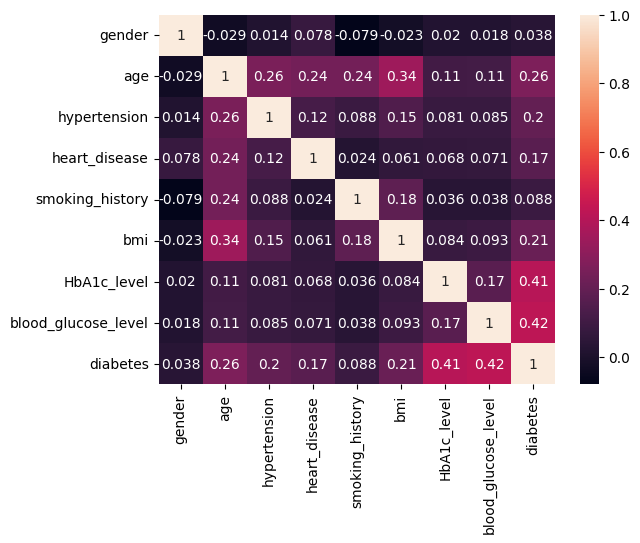

In [15]:
# generate heatmap

corr_matrix = df.corr()
sns.heatmap(corr_matrix, annot=True)
plt.show()

In [16]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size= 0.2, random_state= 405)

# logistic_model = LogisticRegression(max_iter=1000).fit(X_train, y_train).predict(X_test)

random_forest_model = RandomForestClassifier()
random_forest_model.fit(X_train, y_train)



RandomForestClassifier()

In [17]:
# import logistic regression

from sklearn.linear_model import LogisticRegression

In [18]:
linear_model = LogisticRegression(max_iter=1000)
linear_model.fit(X_train, y_train)

linear_model.score(X_test, y_test)

0.9625065002600104

In [25]:
from sklearn.svm import SVC

In [26]:
svm_model = SVC()
svm_model.fit(X_train, y_train)
svm_model.score(X_test, y_test)

0.9471658866354654

In [27]:
# impport knn

from sklearn.neighbors import KNeighborsClassifier

In [28]:
knn_model = KNeighborsClassifier()
knn_model.fit(X_train, y_train)
knn_model.score(X_test, y_test)

0.9511700468018721

In [29]:
# import decision tree

from sklearn.tree import DecisionTreeClassifier

In [30]:
decision_tree_model = DecisionTreeClassifier()
decision_tree_model.fit(X_train, y_train)
decision_tree_model.score(X_test, y_test)

0.9502340093603744

In [19]:
# calculate both training and testing accuracy

accuracy = random_forest_model.score(X_train, y_train)
print(f"Training Accuracy: {accuracy}")

accuracy = random_forest_model.score(X_test, y_test)
print(f"Testing Accuracy: {accuracy}")

Training Accuracy: 0.9991809246450674
Testing Accuracy: 0.9703588143525741


In [20]:
joblib.dump(random_forest_model, 'random_forest_model.joblib')

['random_forest_model.joblib']

In [21]:
random_forest_model = joblib.load('random_forest_model.joblib')

In [22]:
sample = [1, 15, 0, 1, 4, 40, 6.6, 0]

columns = ['gender', 'age', 'hypertension', 'heart_disease', 'smoking_history', 'bmi', 'HbA1c_level', 'blood_glucose_level']
sample_df = pd.DataFrame([sample], columns=columns)
result = random_forest_model.predict(sample_df)
print("Predicted Diabetes:", "Yes" if result[0] == 1 else "No")

Predicted Diabetes: No


In [23]:
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

y_pred = random_forest_model.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
confusion = confusion_matrix(y_test, y_pred)
report = classification_report(y_test, y_pred)

print("Accuracy:", accuracy)
print("Confusion Matrix:\n", confusion)
print("Classification Report:\n", report)

Accuracy: 0.9703588143525741
Confusion Matrix:
 [[17517    62]
 [  508  1143]]
Classification Report:
               precision    recall  f1-score   support

           0       0.97      1.00      0.98     17579
           1       0.95      0.69      0.80      1651

    accuracy                           0.97     19230
   macro avg       0.96      0.84      0.89     19230
weighted avg       0.97      0.97      0.97     19230



In [32]:
# import precisionscore,recall_score,f1_score

from sklearn.metrics import precision_score, recall_score, f1_score

In [33]:
# calculate these values 
# Accuracy,precision,recall,and f1 score 

print("Accuracy:", accuracy_score(y_test, y_pred))
print("Precision:", precision_score(y_test, y_pred))
print("Recall:", recall_score(y_test, y_pred))
print("F1 Score:", f1_score(y_test, y_pred))





Accuracy: 0.9703588143525741
Precision: 0.9485477178423236
Recall: 0.6923076923076923
F1 Score: 0.8004201680672269
